In [0]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from datetime import datetime

% matplotlib inline

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!pip install gitpython

In [0]:
from git import Repo

In [0]:
os.chdir('/content')
from google.colab import files
keys = files.upload()

!ls

Saving ssh.tar.gz to ssh.tar.gz
drive  sample_data  ssh.tar.gz


In [0]:
!rm -rf /root/.ssh

!mkdir /root/.ssh

!tar xvzf ssh.tar.gz

!cp ssh-colab/* /root/.ssh && rm -rf ssh-colab
!chmod 700 /root/.ssh

!touch /root/.ssh/known_hosts
!ssh-keyscan github.com >> /root/.ssh/known_hosts
!chmod 644 /root/.ssh/known_hosts

ssh-colab/
ssh-colab/config
ssh-colab/id_rsa_colab
ssh-colab/id_rsa_colab.pub
# github.com:22 SSH-2.0-babeld-17f81433
# github.com:22 SSH-2.0-babeld-17f81433
# github.com:22 SSH-2.0-babeld-17f81433


In [0]:
!ssh-agent /bin/bash

bash: cannot set terminal process group (141): Inappropriate ioctl for device
bash: no job control in this shell
]0;root@a63d87e73401: /contentroot@a63d87e73401:/content# ssh-add /root/.ssh/id_rsa_colab
Identity added: /root/.ssh/id_rsa_colab (/root/.ssh/id_rsa_colab)
]0;root@a63d87e73401: /contentroot@a63d87e73401:/content# ssh-add l
l: No such file or directory
]0;root@a63d87e73401: /contentroot@a63d87e73401:/content# ssh-add -l
2048 SHA256:SpU/DuMOwLsZmS9hdQfImWud0o5YhuYTkxLgNOtF1aA /root/.ssh/id_rsa_colab (RSA)
]0;root@a63d87e73401: /contentroot@a63d87e73401:/content# exit
exit


In [0]:
!git config --global user.email 'rashmi.raviprasad@gmail.com'
!git config --global user.name 'rashmi-raviprasad'

In [0]:
os.chdir('/content/drive/My Drive/Springboard DS Course/REPOSITORY')
!ssh-agent /bin/bash
!git clone git@github.com:rashmi-raviprasad/springboard.git

bash: cannot set terminal process group (141): Inappropriate ioctl for device
bash: no job control in this shell

exit
Cloning into 'springboard'...
remote: Enumerating objects: 374, done.
remote: Counting objects: 100% (374/374), done.
remote: Compressing objects: 100% (292/292), done.
remote: Total 687 (delta 132), reused 293 (delta 60), pack-reused 313
Receiving objects: 100% (687/687), 77.44 MiB | 9.60 MiB/s, done.
Resolving deltas: 100% (284/284), done.
Checking out files: 100% (188/188), done.


In [0]:
repository = '/content/drive/My Drive/Springboard DS Course/REPOSITORY/springboard'
os.chdir(repository + '/faces_capstone2')
#import csv
with open('sample.csv', 'w', newline='') as testfile:
  testwriter = csv.writer(testfile, delimiter=' ')
  testwriter.writerow(['sample commit'])


In [0]:
os.chdir('..')

In [0]:
!git pull
!git add .
!git commit -m 'sample commit from colab'
!git push

Already up to date.
[master 431ad9d] sample commit from colab
 1 file changed, 1 insertion(+)
 create mode 100644 faces_capstone2/sample.csv
Counting objects: 4, done.
Delta compression using up to 4 threads.
Compressing objects: 100% (3/3), done.
Writing objects: 100% (4/4), 366 bytes | 366.00 KiB/s, done.
Total 4 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To github.com:rashmi-raviprasad/springboard.git
   a7d25d4..431ad9d  master -> master


In [0]:
SAMPLE_DIRECTORY = '/content/drive/My Drive/Springboard DS Course/CAPSTONE 2/IMAGES/sample_dataset'
IMAGE_DIRECTORY = '/content/drive/My Drive/Springboard DS Course/CAPSTONE 2/IMAGES'

In [0]:
from keras.models import Sequential

class Decoder(Sequential):
  def load_data(self, directory=None, sample_run=False):
    if sample_run:
      all_sample_imgs = []
      y_train_sample = []
      y_valid_sample = []
      for folder in os.listdir(SAMPLE_DIRECTORY):
        for file in os.listdir(SAMPLE_DIRECTORY+'/'+folder):
          fn = SAMPLE_DIRECTORY + '/' + folder + '/' + file
          img = cv2.imread(fn)
          rgb_image =  cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
          all_sample_imgs.append(rgb_image.astype(np.float32) / 255.)
      seed = 42
      np.random.seed(seed)
      np.random.shuffle(all_sample_imgs)
      y_train_sample = all_sample_imgs[:40]
      y_valid_sample = all_sample_imgs[40:]
      x_train_sample = np.arange(len(y_train_sample))
      x_valid_sample = np.arange(len(y_valid_sample))
      x_all_sample = np.arange(len(all_sample_imgs))
      self.all_dim = np.asarray(all_sample_imgs).shape[0]
      TRAIN_DIM = np.asarray(y_train_sample).shape[0]
      VALID_DIM = np.asarray(y_valid_sample).shape[0]
      self.x = np.array(x_all_sample)
      self.y = np.array(all_sample_imgs)
    else:
      self.all_imgs = []
      y_train = []
      y_valid = []
      try:
        for folder in os.listdir(IMAGE_DIRECTORY)[:2]:
          for file in tqdm(os.listdir(IMAGE_DIRECTORY+'/'+folder)[:25]):
            fn = IMAGE_DIRECTORY + '/' + folder + '/' + file
            img = cv2.imread(fn)
            rgb_image =  cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            self.all_imgs.append(rgb_image.astype(np.float32) / 255.)
      except:
        print(file)
      seed = 42
      np.random.seed(seed)
      np.random.shuffle(self.all_imgs)
      #y_train = all_imgs[:40000]
      #y_valid = all_imgs[40000:]
      #x_valid = np.arange(len(y_valid))
      x_all = np.arange(len(self.all_imgs))
      self.all_dim = np.asarray(self.all_imgs).shape[0]
      TRAIN_DIM = np.asarray(y_train).shape[0]
      VALID_DIM = np.asarray(y_valid).shape[0]
      self.x = np.array(x_all)
      self.y = np.array(self.all_imgs)
  def build_model(self, n_components, model_filename, log_filename, decoder=None):
    decoder = Sequential()
    decoder.add(Embedding(input_dim=self.all_dim, output_dim=n_components, input_length=1))
    decoder.add(Flatten())
    decoder.add(Reshape((1, 1, n_components)))
    decoder.add(Conv2DTranspose(filters=64, kernel_size=3, strides=1, activation='relu'))
    decoder.add(Conv2DTranspose(filters=64, kernel_size=3, strides=1, activation='relu'))
    decoder.add(Conv2DTranspose(filters=32, kernel_size=3, strides=1, activation='relu'))
    decoder.add(Conv2DTranspose(filters=32, kernel_size=3, strides=2, activation='relu'))
    decoder.add(Conv2DTranspose(filters=16, kernel_size=3, strides=2, activation='relu'))
    decoder.add(Conv2DTranspose(filters=16, kernel_size=3, strides=2, activation='relu'))
    decoder.add(Conv2DTranspose(filters=8, kernel_size=3, strides=2, activation='relu'))
    decoder.add(Conv2DTranspose(filters=3, kernel_size=4, strides=2, activation='sigmoid'))
    decoder.compile(optimizer='adam', loss='mse')
    self.model_filename = model_filename
    decoder.save(self.model_filename)
    self.decoder = decoder
    data_dict = {'Date':[datetime.now()], 'Run_Number':[0], 'Num_Epochs_Tot':[0]}
    train_log = pd.DataFrame.from_dict(data_dict)
    self.log_filename = log_filename
    train_log.to_csv(self.log_filename)
  def fit_model(self, i, batch_size, n_epochs):
    model = load_model(self.model_filename)
    model.fit(self.x, self.y, batch_size=batch_size, epochs=n_epochs, validation_split=0.2)
    model.save(self.model_filename)
    train_log = pd.read_csv(self.log_filename)
    data_dict = {'Date':[datetime.now()], 'Run_Number':[i+1], 'Num_Epochs_Tot':[N_EPOCHS*(i+1)]}
    train_log = train_log.append(data_dict, ignore_index=True)
    train_log.to_csv(self.log_filename)
  def predict_model(self, batch_size):
    self.decoder = load_model(self.model_filename)
    return self.decoder.predict(self.x, batch_size=batch_size)

Using TensorFlow backend.


In [0]:
decoder_model = Decoder()
decoder_model.load_data()

100%|██████████| 25/25 [00:15<00:00,  1.83it/s]


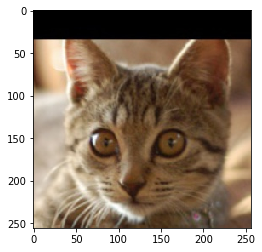

50


In [0]:
plt.imshow(decoder_model.all_imgs[25])
plt.show()
print(len(decoder_model.all_imgs))

In [0]:
#from keras.models import Sequential
from keras.layers import Activation, Input, Flatten, Reshape
from keras.layers.convolutional import Conv2DTranspose
from keras.layers.embeddings import Embedding
from keras.callbacks import TensorBoard
from keras import backend as K
K.set_image_data_format('channels_last')
K.clear_session()

In [0]:
BATCH_SIZE = 10
N_COMPONENTS = 100
MODEL_FN = 'decoder.h5'
LOGS_FN = 'train_log.csv'
N_EPOCHS = 5

decoder_model.build_model(N_COMPONENTS, MODEL_FN, LOGS_FN)

'\ndecoder.add(Embedding(input_dim=ALL_DIM, output_dim=N_COMPONENTS, input_length=1))\ndecoder.add(Flatten())\ndecoder.output_shape # (None, 100)\n'

In [0]:
from keras.models import load_model

for i in range(2):
  print('Training Batch # %d' % (i+1))
  decoder_model.fit_model(i, BATCH_SIZE, N_EPOCHS)
  print('Trained %d epochs for total of %d epochs total' % (N_EPOCHS, N_EPOCHS*(i+1)))


Training Batch # 1


Train on 40 samples, validate on 10 samples
Epoch 1/5
40/40 [==============================] - 7s 166ms/step - loss: 0.0739 - val_loss: 0.0792
Epoch 2/5
40/40 [==============================] - 0s 1ms/step - loss: 0.0737 - val_loss: 0.0790
Epoch 3/5
40/40 [==============================] - 0s 1ms/step - loss: 0.0735 - val_loss: 0.0787
Epoch 4/5
40/40 [==============================] - 0s 1ms/step - loss: 0.0732 - val_loss: 0.0784
Epoch 5/5
40/40 [==============================] - 0s 1ms/step - loss: 0.0729 - val_loss: 0.0780
Trained 5 epochs for total of 5 epochs total
Training Batch # 2
Train on 40 samples, validate on 10 samples
Epoch 1/5
40/40 [==============================] - 0s 12ms/step - loss: 0.0725 - val_loss: 0.0775
Epoch 2/5
40/40 [==============================] - 0s 1ms/step - loss: 0.0720 - val_loss: 0.0768
Epoch 3/5
40/40 [==============================] - 0s 1ms/step - loss: 0.0713 - val_loss: 0.0758
Epoch 4/5
40/40 [==============================]

In [0]:
compressed = decoder_model.predict_model(batch_size=BATCH_SIZE)

32


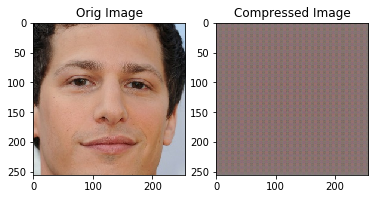

In [0]:
PIC = np.random.choice(50)
print(PIC)
plt.subplot(1,2,1)
plt.imshow(decoder_model.all_imgs[PIC])
plt.title('Orig Image')

plt.subplot(1,2,2)
plt.imshow(compressed[PIC])
plt.title('Compressed Image')

plt.show()

In [0]:
print(decoder_model.summary())

ValueError: ignored